<a href="https://colab.research.google.com/github/kishorekubendiran/Data_Preprocessing-Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset

In [3]:
Data = pd.read_csv("https://raw.githubusercontent.com/Yuvaranii/Data_Preprocessing/main/Social_Network_Ads.csv")


In [4]:
Data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
Data.drop(["User ID"], axis = 1, inplace = True)

In [6]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Column = ["Gender"]
Data[Column] = Data[Column].apply(Encoder.fit_transform)

In [7]:
Data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


Splitting the dataset into the Training set and Test set

In [8]:
X = Data.drop(["Purchased"], axis = 1)
Y = Data["Purchased"]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Feature Scaling

In [10]:
#from sklearn.preprocessing import StandardScaler
#SC = StandardScaler()
#X_train = SC.fit_transform(X_train)
#X_test = SC.transform(X_test)

##Feature Scaling is reducing the accuracy here so commenting

Fitting Random Forest to the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50, random_state=42)
Res = RF.fit(X_train, Y_train)

Predicting the Test set results

In [12]:
Res.score(X_test, Y_test)

0.9

In [13]:
Res.predict(X_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [14]:
Res.predict([[1,10,190000]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
Y_pred = Res.predict(X_test)
CM = confusion_matrix(Y_pred, Y_test)
CM

array([[47,  3],
       [ 5, 25]])

Visualising the Test set results

Text(33.0, 0.5, 'Truth')

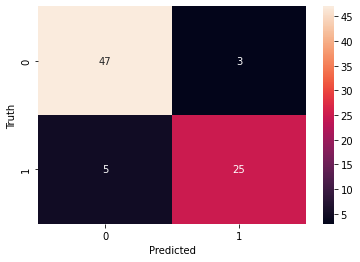

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")